# IMPORTS

In [19]:
import collections
import matplotlib.pyplot as plt
from collections import defaultdict
import collections
import numpy as np
from statistics import mean 
import time
import networkx as nx
from scipy import stats
from sklearn import preprocessing

# GRAPH READER

In [20]:
"""Benchmark dataset reader."""
ts = time.time()
from littleballoffur.data_reader import GraphReader

reader = GraphReader('HR')

graph = reader.get_graph()
time.time() - ts


0.6818969249725342

In [21]:
print(len(graph.nodes()))

54573


# SAMPLING

Random Walk Sampler

In [22]:
ts = time.time()
#Random walk

from littleballoffur.exploration_sampling import RandomWalkSampler

sampler = RandomWalkSampler(10915)

rw_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(rw_graph.nodes))
time.time() - ts

original graph nodes 54573
after sampling graph nodes 10915


0.05541515350341797

Non Back Tracking Random Walk

In [23]:
ts = time.time()
"""Non back-tracking random walk sampler example"""

from littleballoffur.exploration_sampling import NonBackTrackingRandomWalkSampler

sampler = NonBackTrackingRandomWalkSampler(10915)

nrw_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(nrw_graph.nodes))
time.time() - ts

original graph nodes 54573
after sampling graph nodes 10915


0.05500483512878418

Metropolis Hastings Random Walk Sampler

In [24]:
ts = time.time()
"""Snow ball sampler example"""

from littleballoffur.exploration_sampling import MetropolisHastingsRandomWalkSampler

sampler = MetropolisHastingsRandomWalkSampler(number_of_nodes = 10915)

metropolis_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(metropolis_graph.nodes))
time.time() - ts

original graph nodes 54573
after sampling graph nodes 10915


0.07549500465393066

Forest Fire Sampler

In [25]:
ts = time.time()
"""Forest fire sampler example"""

from littleballoffur.exploration_sampling import ForestFireSampler

sampler = ForestFireSampler(10915)

ff_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(ff_graph.nodes))
time.time() - ts

original graph nodes 54573
after sampling graph nodes 10915


0.17153620719909668

Spiky Sampler

In [26]:
ts = time.time()
"""Shortest path sampler example"""

from littleballoffur.exploration_sampling import SpikyBallSampler

sampler = SpikyBallSampler(10915)

spiky_graph = sampler.sample(graph)

print('original graph nodes', len(graph.nodes))
print('after sampling graph nodes', len(spiky_graph.nodes))
time.time() - ts

original graph nodes 54573
after sampling graph nodes 10915


0.4161720275878906

# STATISTICS

In [27]:
ts = time.time()
#Original graph
print('Average Clustering - Original: ',nx.average_clustering(graph))

print('-------------------------------------------------------------------')
#Random Walk
print('Average Clustering - Random Walk: ',nx.average_clustering(rw_graph))

#Non Back tracking Random Walk
print('Average Clustering - Non back Tracking Random Walk: ',nx.average_clustering(nrw_graph))

#Metropolis Hastings Random Walk
print('Average Clustering - Metropolis Hastings Random Walk: ',nx.average_clustering(metropolis_graph))

#Forest Fire
print('Average Clustering - Forest Fire: ',nx.average_clustering(ff_graph))

#Spiky 
print('Average Clustering - Spiky: ',nx.average_clustering(spiky_graph))


time.time() - ts



Average Clustering - Original:  0.1364767450625625
-------------------------------------------------------------------
Average Clustering - Random Walk:  0.16904866515030786
Average Clustering - Non back Tracking Random Walk:  0.17092446049734178
Average Clustering - Metropolis Hastings Random Walk:  0.1567396734018774
Average Clustering - Forest Fire:  0.16310954142440173
Average Clustering - Spiky:  0.16471146000735687


13.066858053207397

In [28]:
ts = time.time()
#Original graph
print('Triangles Percentage - Original: ',(sum(nx.triangles(graph).values()) / 3)/len(graph.nodes))

print('-------------------------------------------------------------------')
#Random Walk
print('Triangles Percentage- Random Walk: ',(sum(nx.triangles(rw_graph).values()) / 3)/len(rw_graph.nodes))

#Non Back tracking Random Walk
print('Triangles Percentage - Non back Tracking Random Walk: ',(sum(nx.triangles(nrw_graph).values()) / 3)/len(nrw_graph.nodes))

#Metropolis Hastings Random Walk
print('Triangles Percentage - Metropolis Hastings Random Walk: ',(sum(nx.triangles(metropolis_graph).values()) / 3)/len(metropolis_graph.nodes))

#Forest Fire
print('Triangles Percentage - Forest Fire: ',(sum(nx.triangles(ff_graph).values()) / 3)/len(ff_graph.nodes))

#Spiky 
print('Triangles Percentage - Spiky: ',(sum(nx.triangles(spiky_graph).values()) / 3)/len(spiky_graph.nodes))



time.time() - ts



Triangles Percentage - Original:  12.173272497388819
-------------------------------------------------------------------
Triangles Percentage- Random Walk:  7.2845625286303255
Triangles Percentage - Non back Tracking Random Walk:  7.0550618415025195
Triangles Percentage - Metropolis Hastings Random Walk:  2.708199725148878
Triangles Percentage - Forest Fire:  8.922125515345854
Triangles Percentage - Spiky:  3.6555199267063676


13.057260036468506

In [29]:
ts = time.time()
#Original graph
print('Size of largest connected component - Original: ',len(max(nx.connected_components(graph))))

print('-------------------------------------------------------------------')
#Random Walk
print('Size of largest connected component- Random Walk: ',len(max(nx.connected_components(rw_graph))))

#Non Back tracking Random Walk
print('Size of largest connected component - Non back Tracking Random Walk: ',len(max(nx.connected_components(nrw_graph))))

#Metropolis Hastings Random Walk
print('Size of largest connected component - Metropolis Hastings Random Walk: ',len(max(nx.connected_components(metropolis_graph))))

#Forest Fire
print('Size of largest connected component - Forest Fire: ',len(max(nx.connected_components(ff_graph))))

#Spiky
print('Size of largest connected component - Spiky: ',len(max(nx.connected_components(spiky_graph))))


time.time() - ts


Size of largest connected component - Original:  54573
-------------------------------------------------------------------
Size of largest connected component- Random Walk:  10915
Size of largest connected component - Non back Tracking Random Walk:  10915
Size of largest connected component - Metropolis Hastings Random Walk:  10915
Size of largest connected component - Forest Fire:  10915
Size of largest connected component - Spiky:  10888


0.5861942768096924

In [30]:
print((nx.number_connected_components(graph)))

1


In [31]:
ts = time.time()
#Original graph
print('Degree Assortativity Coefficient - Original: ',nx.degree_assortativity_coefficient(graph))

print('-------------------------------------------------------------------')

#Random Walk
print('Degree Assortativity Coefficient - Random Walk: ',nx.degree_assortativity_coefficient(rw_graph))

#Non Back tracking Random Walk
print('Degree Assortativity Coefficient - Non back Tracking Random Walk: ',nx.degree_assortativity_coefficient(nrw_graph))

#Metropolis Hastings Random Walk
print('Degree Assortativity Coefficient - Metropolis Hastings Random Walk: ',nx.degree_assortativity_coefficient(metropolis_graph))

#Forest Fire
print('Degree Assortativity Coefficient - Forest Fire: ',nx.degree_assortativity_coefficient(ff_graph))

#Spiky
print('Degree Assortativity Coefficient - Spiky: ',nx.degree_assortativity_coefficient(spiky_graph))


time.time() - ts



Degree Assortativity Coefficient - Original:  0.19710612717297066
-------------------------------------------------------------------
Degree Assortativity Coefficient - Random Walk:  0.18534254956370477
Degree Assortativity Coefficient - Non back Tracking Random Walk:  0.19007606851184525
Degree Assortativity Coefficient - Metropolis Hastings Random Walk:  0.24624339266439466
Degree Assortativity Coefficient - Forest Fire:  0.24679299947899125
Degree Assortativity Coefficient - Spiky:  0.19681081017850433


12.142800092697144

# MATCHING PATTERNS - PLOTS

In [32]:
def degree_distributon(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    return deg,cnt

In [33]:
ts = time.time()
#Original 
deg,cnt = degree_distributon(graph)

#Random Walk
deg1,cnt1 = degree_distributon(rw_graph)

#Non Back tracking Random Walk
deg2,cnt2 = degree_distributon(nrw_graph)

#Metropolis Hastings Random Walk
deg5,cnt5 = degree_distributon(metropolis_graph)

#Forest Fire
deg3,cnt3 = degree_distributon(ff_graph)

#Spiky
deg4,cnt4 = degree_distributon(spiky_graph)


time.time() - ts

0.5472550392150879

Text(0.5, 0, 'Degree')

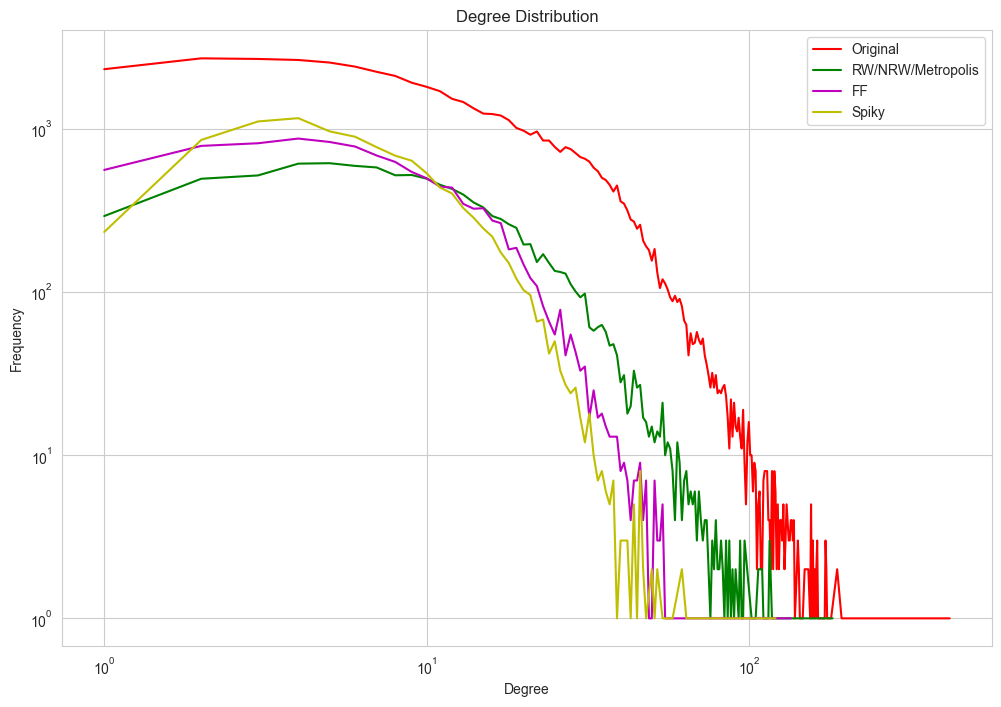

In [45]:
plt.figure(figsize=(12, 8))
plt.loglog(deg, cnt, 'r-', label='original')
# plt.loglog(deg1,cnt1, 'b-', label='RW')
# plt.loglog(deg2,cnt2,'k-', label='Non - RW')
plt.loglog(deg3, cnt3, 'g-', label='Metropolis')
plt.loglog(deg4, cnt4, 'm-', label='FF')
plt.loglog(deg5, cnt5, 'y-', label='Spiky')
plt.legend(['Original','RW/NRW/Metropolis','FF','Spiky'])
plt.title("Degree Distribution")
plt.ylabel("Frequency")
plt.yscale('log')
# plt.xscale('log')
plt.xlabel("Degree")

In [35]:
def degree_clustering(original, sample):
   degree = sample.degree()
   degree_list,degrees,clustering_list,kstest = [],[],[],[]
   
   for n,m in degree:
      degree_list.append(m)
   degree_list
   degree_np = np.asarray(sorted(degree_list))
  

   for k in range(len(np.unique(degree_np))):
      sample_nodes_degree_k = ([u for u in sample.nodes() if sample.degree(u) == k])
      if len(sample_nodes_degree_k) != 0:
        sample_clustering_coef = nx.clustering(sample, sample_nodes_degree_k)
        original_nodes_degree_k = ([u for u in original.nodes() if original.degree(u) == k])
        original_clustering_coef = nx.clustering(original, original_nodes_degree_k)
        avg_clustering_coeff = nx.average_clustering(sample, sample_nodes_degree_k)

        original_clustering_coef = np.fromiter(original_clustering_coef.values(), dtype=float)
        
        sample_clustering_coef = np.fromiter(sample_clustering_coef.values(), dtype=float)
        
        if len(original_clustering_coef) != 0:
         if len(sample_clustering_coef) != 0:
            ks_test = stats.ks_2samp(preprocessing.scale(original_clustering_coef), preprocessing.scale(sample_clustering_coef))[0]

            kstest.append(ks_test)
        degrees.append(k)
        clustering_list.append(avg_clustering_coeff)
      nodes_degree_k = []
    
   avg_kstest = np.average(kstest)
         
   return degrees,clustering_list,avg_kstest 

In [36]:
ts = time.time()

degrees,clustering_list,avg_kstest = degree_clustering(graph,graph)
degrees1,clustering_list1,avg_kstest1 = degree_clustering(graph,rw_graph)
degrees2,clustering_list2,avg_kstest2 = degree_clustering(graph,nrw_graph)
degrees3,clustering_list3,avg_kstest3 = degree_clustering(graph,metropolis_graph)
degrees4,clustering_list4,avg_kstest4 = degree_clustering(graph,ff_graph)
degrees5,clustering_list5,avg_kstest5 = degree_clustering(graph,spiky_graph)

time.time() - ts


133.65929698944092

Text(0.5, 0, 'Node Degree')

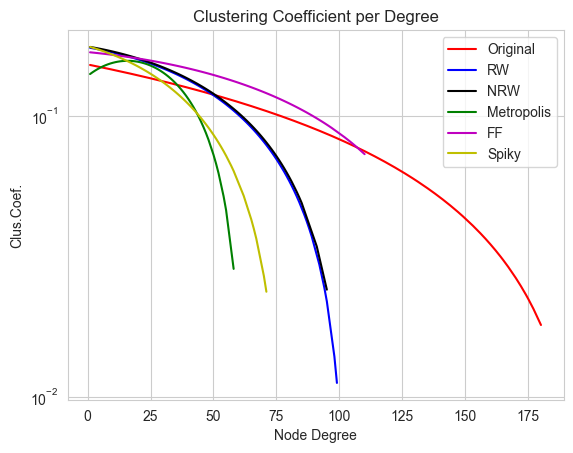

In [48]:
z = np.polyfit(degrees, clustering_list,2)
p = np.poly1d(z)
plt.plot(degrees,p(degrees),"r")

z = np.polyfit(degrees1, clustering_list1,2)
p = np.poly1d(z)
plt.plot(degrees1,p(degrees1),"blue")

z = np.polyfit(degrees2, clustering_list2,2)
p = np.poly1d(z)
plt.plot(degrees2,p(degrees2),"black")

z = np.polyfit(degrees3, clustering_list3,2)
p = np.poly1d(z)
plt.plot(degrees3,p(degrees3),"g")

z = np.polyfit(degrees4, clustering_list4,2)
p = np.poly1d(z)
plt.plot(degrees4,p(degrees4),"m")

z = np.polyfit(degrees5, clustering_list5,2)
p = np.poly1d(z)
plt.plot(degrees5,p(degrees5),"y")

plt.legend(['Original','RW', 'NRW', 'Metropolis','FF','Spiky'])
plt.title("Clustering Coefficient per Degree")
plt.ylabel("Clus.Coef.")
# plt.xscale('log')
plt.yscale('log')
plt.xlabel("Node Degree")

In [38]:
def average_degree_neighbor(original, sample):
   degree = sample.degree()
   degree_list,degrees,neighbor_list,kstest = [],[],[],[]
   for n,m in degree:
      degree_list.append(m)
   degree_list
   degree_np = np.asarray(sorted(degree_list))
  

   for k in range(len(np.unique(degree_np))):
      nodes_degree_k = ([u for u in sample.nodes() if sample.degree(u) == k])
      # print(nodes_degree_k)
      if len(nodes_degree_k) != 0:
         sample_aver_neighbor_deg = nx.average_neighbor_degree( sample , nodes = nodes_degree_k)

         original_nodes_degree_k = ([u for u in original.nodes() if original.degree(u) == k])
         original_aver_neighbor_deg = nx.average_neighbor_degree( original , nodes = original_nodes_degree_k)


         original_avg_neighbor_degree = np.fromiter(original_aver_neighbor_deg.values(), dtype=float)
         sample_aver_neighbor_deg = np.fromiter(sample_aver_neighbor_deg.values(), dtype=float)

         if len(original_avg_neighbor_degree) != 0:
            if len(sample_aver_neighbor_deg) != 0:
               ks_test = stats.ks_2samp(preprocessing.scale(original_avg_neighbor_degree), preprocessing.scale(sample_aver_neighbor_deg))[0]
         
               kstest.append(ks_test)

         list_avg = mean(sample_aver_neighbor_deg) 
         degrees.append(k)
         neighbor_list.append(list_avg)
      nodes_degree_k = []
   
   kstest_neighbor_degree = np.average(kstest)
         
   return degrees,neighbor_list,kstest_neighbor_degree

In [39]:
ts = time.time()

degrees,neighbor_list,kstest_neighbor_degree = average_degree_neighbor(graph,graph)
degrees1,neighbor_list1,kstest_neighbor_degree1 = average_degree_neighbor(graph,rw_graph)
degrees2,neighbor_list2,kstest_neighbor_degree2 = average_degree_neighbor(graph,nrw_graph)
degrees3,neighbor_list3,kstest_neighbor_degree3 = average_degree_neighbor(graph,metropolis_graph)
degrees4,neighbor_list4,kstest_neighbor_degree4 = average_degree_neighbor(graph,ff_graph)
degrees5,neighbor_list5,kstest_neighbor_degree5 = average_degree_neighbor(graph,spiky_graph)

time.time() - ts

184.3282961845398

Text(0.5, 0, 'Node Degree')

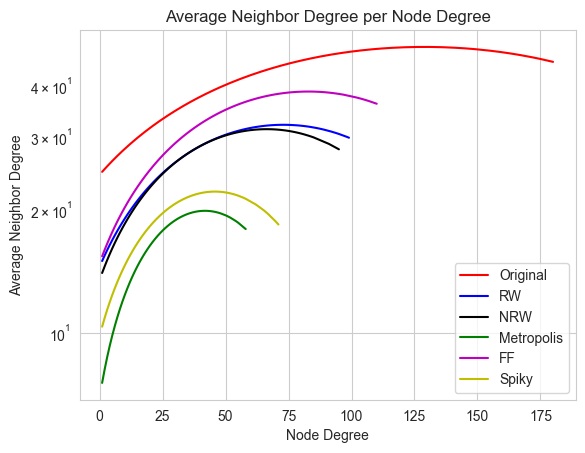

In [49]:
z = np.polyfit(degrees, neighbor_list,2)
p = np.poly1d(z)
plt.plot(degrees,p(degrees),"r")

z = np.polyfit(degrees1, neighbor_list1,2)
p = np.poly1d(z)
plt.plot(degrees1,p(degrees1),"blue")

z = np.polyfit(degrees2, neighbor_list2,2)
p = np.poly1d(z)
plt.plot(degrees2,p(degrees2),"black")

z = np.polyfit(degrees3, neighbor_list3,2)
p = np.poly1d(z)
plt.plot(degrees3,p(degrees3),"g")

z = np.polyfit(degrees4, neighbor_list4,2)
p = np.poly1d(z)
plt.plot(degrees4,p(degrees4),"m")

z = np.polyfit(degrees5, neighbor_list5,2)
p = np.poly1d(z)
plt.plot(degrees5,p(degrees5),"y")

plt.legend(['Original','RW', 'NRW', 'Metropolis','FF', 'Spiky'])
plt.title("Average Neighbor Degree per Node Degree")
plt.ylabel("Average Neighbor Degree")
# plt.xscale('log')
plt.yscale('log')
plt.xlabel("Node Degree")

# KOLMOGOROV-SMIRNOV TEST

KS-TEST FOR DEGREE DISTRIBUTION

In [41]:
#SCALING THE DATA

std_deg = preprocessing.scale(deg)
std_deg1 = preprocessing.scale(deg1)
std_deg2 = preprocessing.scale(deg2)
std_deg3 = preprocessing.scale(deg3)
std_deg4 = preprocessing.scale(deg4)
std_deg5 = preprocessing.scale(deg5)

In [42]:
print("RW ---> ", stats.ks_2samp(std_deg, std_deg1))
print("N-RW ---> ", stats.ks_2samp(std_deg, std_deg2))
print("Metropolis ---> ", stats.ks_2samp(std_deg, std_deg3))
print("FF ---> ", stats.ks_2samp(std_deg, std_deg4))
print("Spiky ---> ", stats.ks_2samp(std_deg, std_deg5))

RW --->  KstestResult(statistic=0.02746726285531779, pvalue=0.9999999879813499)
N-RW --->  KstestResult(statistic=0.039352621660569784, pvalue=0.9998458787971076)
Metropolis --->  KstestResult(statistic=0.04504504504504504, pvalue=0.9973412680342525)
FF --->  KstestResult(statistic=0.039874551971326166, pvalue=0.9999772076807025)
Spiky --->  KstestResult(statistic=0.0543010752688172, pvalue=0.9979482733150667)


KS-TEST FOR AVERAGE CLUSTERING COEFFICIENT PER NODE DEGREE

In [43]:
print("RW ---> ", avg_kstest1)
print("N-RW ---> ", avg_kstest2)
print("Metropolis ---> ", avg_kstest3)
print("FF ---> ", avg_kstest4)
print("Spiky ---> ",avg_kstest5)

RW --->  0.24160937712535932
N-RW --->  0.21977941551746882
Metropolis --->  0.24901509084118828
FF --->  0.24323036784066254
Spiky --->  0.24617494581598895


KS-TEST FOR AVERAGE NEIGHBORHOOD DEGREE PER NODE DEGREE

In [44]:
print("RW ---> ", kstest_neighbor_degree1)
print("N-RW ---> ", kstest_neighbor_degree2)
print("Metropolis ---> ", kstest_neighbor_degree3)
print("FF ---> ", kstest_neighbor_degree4)
print("Spiky ---> ",kstest_neighbor_degree5)

RW --->  0.21237046194631748
N-RW --->  0.19909605535082509
Metropolis --->  0.19821274204935738
FF --->  0.2101176221039023
Spiky --->  0.21113381900266626
